This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [19]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [20]:
# importing dataset

df = pd.read_csv('heart.csv')

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df.shape

(303, 14)

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


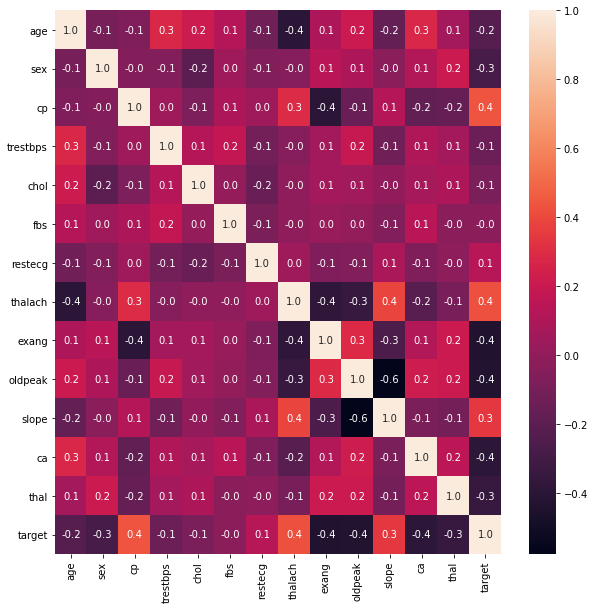

In [25]:
# finding correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f') #fmt used for string formatting
plt.show()

 Target is +ve correlated to chest pain ,thalach columns

In [26]:
# analysing age column

df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

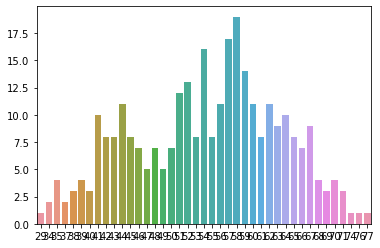

In [27]:
sns.barplot(x=df.age.value_counts().index,y=df.age.value_counts().values)
plt.xlable=['Age']
plt.ylable=['Age count']
plt.title=['Age Analysis']

plt.show

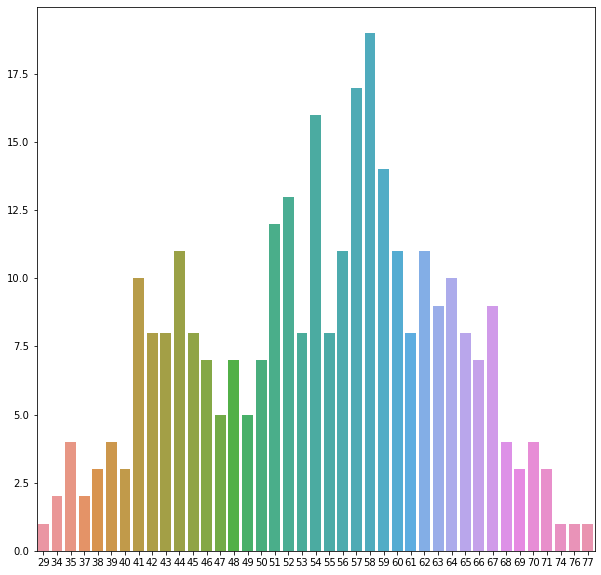

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.age.value_counts().index,y=df.age.value_counts().values)
plt.show()


In [29]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

 1--> patients with heart disease
    
 0 --> with no heart disease 

In [32]:
# checking in percentage

count_NoDisease = len(df[df.target == 0])
count_HaveDisease = len(df[df.target == 1])

print("percentage of people with no heart disease: {:0.2f}%".format((count_NoDisease/(len(df.target)))*100))
      
print("percentage of people with Heart disease: {:0.2f}%".format((count_HaveDisease/(len(df.target)))*100))


percentage of people with no heart disease: 45.54%
percentage of people with Heart disease: 54.46%


In [37]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

print("% of Female patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("% of Male patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

% of Female patients: 31.68%
% of Male patients: 68.32%


In [39]:
young_ages = df[(df.age>=29) & (df.age<40)]
Middle_ages = df[(df.age>=40) & (df.age<55)]
elderly_ages = df[(df.age>=55)]

print('young ages',len(young_ages))
print('Middle ages',len(Middle_ages))
print('Elderly ages',len(elderly_ages))

young ages 16
Middle ages 128
Elderly ages 159


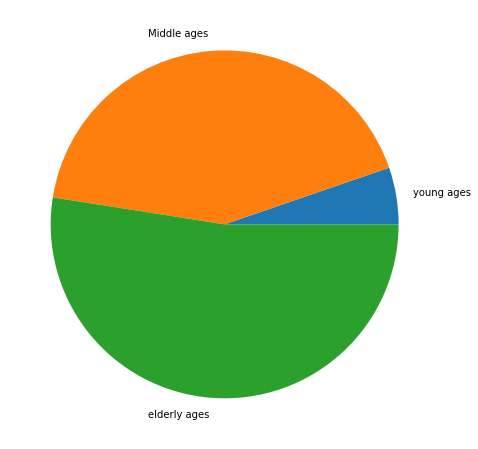

In [50]:


explode=[0.1,0.1,0.1]
plt.figure(figsize=(8,8))
plt.pie([len(young_ages),len(Middle_ages),len(elderly_ages)],labels=['young ages','Middle ages','elderly ages'])
plt.show()

In [51]:
# Chest Pain Analysis

df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

we have 4 type of chest pain

In [53]:
df.target.unique()

array([1, 0], dtype=int64)

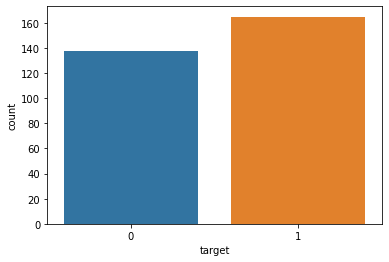

In [57]:
sns.countplot(df.target)
plt.xlabel=['Target']
plt.ylabel=['Count']
plt.show()

# Model building

In [64]:
from sklearn.linear_model import LogisticRegression
X= df.drop(['target'],axis=1)
y = df.target.values

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [69]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Test Accuracy {:.2f}'.format(lr.score(X_test,y_test)*100))

Test Accuracy 88.52


In [70]:
#  Logistic regression model accuaracy-->Test Accuracy 88.52

In [74]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('KNN Accuracy: {:.2f}%'.format(knn.score(X_test,y_test)*100))

KNN Accuracy: 65.57%


In [75]:
# support Vector
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(X_train,y_train)
print('SVM Accuracy: {:.2f}%'.format(svm.score(X_test,y_test)*100))



SVM Accuracy: 70.49%


In [76]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy: {:.2f}%'.format(nb.score(X_test,y_test)*100))


Naive Bayes Accuracy: 86.89%


In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(X_train,y_train)
print('RF Accuracy: {:.2f}%'.format(rf.score(X_test,y_test)*100))

RF Accuracy: 86.89%
